In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r"C:\Users\Abhishek\OneDrive\Desktop\ML and DL\Deep Learning\CNN Project\cats_and_dogs_small\train"
validation_dir = r"C:\Users\Abhishek\OneDrive\Desktop\ML and DL\Deep Learning\CNN Project\cats_and_dogs_small\validation"
test_dir = r"C:\Users\Abhishek\OneDrive\Desktop\ML and DL\Deep Learning\CNN Project\cats_and_dogs_small"

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['accuracy']
             )
#for image format RMSprop have little advantage over sgd

In [6]:
import scipy
print(scipy.__version__)

1.14.1


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # calculated using total images/batch_size :2000/20=100
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50  # images/batch_size = 1000/20=50
)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_27172\946342292.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 58s 501ms/step - loss: 0.6842 - accuracy: 0.5420 - val_loss: 0.6603 - val_accuracy: 0.5950
Epoch 2/20
100/100 [==============================] - 12s 120ms/step - loss: 0.6360 - accuracy: 0.6370 - val_loss: 0.6498 - val_accuracy: 0.6020
Epoch 3/20
100/100 [==============================] - 12s 117ms/step - loss: 0.5886 - accuracy: 0.6890 - val_loss: 0.6304 - val_accuracy: 0.6260
Epoch 4/20
100/100 [==============================] - 12s 117ms/step - loss: 0.5550 - accuracy: 0.7095 - val_loss: 0.6317 - val_accuracy: 0.6530
Epoch 5/20
100/100 [==============================] - 12s 117ms/step - loss: 0.5233 - accuracy: 0.7300 - val_loss: 0.5777 - val_accuracy: 0.6970
Epoch 6/20
100/100 [==============================] - 12s 117ms/step - loss: 0.4935 - accuracy: 0.7545 - val_loss: 0.5764 - val_accuracy: 0.6790
Epoch 7/20
100/100 [==============================] - 12s 123ms/step - loss: 0.4730 - accuracy: 0.7775 - val_loss: 0.5520 - val_ac

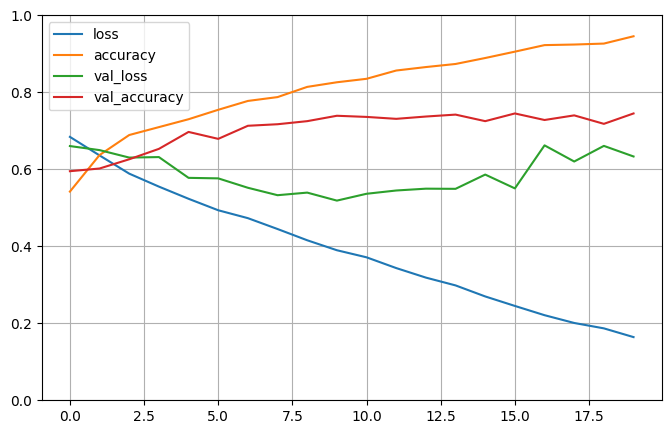

In [12]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* This graph suggests that there is overfitting in our model.
* Per each epoch we are able to increase the accuracy of our model,
* But we can't able to increase the validation accuracy it's clear sign of overfitting of data.
* To fix this overfitting we create some dummy data.

In [13]:
model.save("model.keras")

In [14]:
from tensorflow.keras import backend as K
K.clear_session()
del model

## Data Augmentation Preprocessing
* data augmentation means we are creating new images by manipulating the images we have.
* This is we are doing because of overfitting of data.

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,        #allowing the range of 20% by which new image can shift it's original width.
    height_shift_range = 0.2,       #allowing the range of 20% by which new image can shift it's original height.
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# Dropout layer is used to deactivate given percentage of neurons for each epoch.
model.add(layers.Dropout(0.5))       #A Dropout layer is added to reduce overfitting by randomly "dropping out" (turning off) 50% of the neurons during each update in training.
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4),
             metrics = ['acc'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = 62,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 31
)

Epoch 1/100
62/62 [==============================] - 29s 467ms/step - loss: 0.6763 - acc: 0.5813 - val_loss: 0.7302 - val_acc: 0.5050
Epoch 2/100
62/62 [==============================] - 27s 435ms/step - loss: 0.6729 - acc: 0.5803 - val_loss: 0.6493 - val_acc: 0.6149
Epoch 3/100
62/62 [==============================] - 30s 480ms/step - loss: 0.6650 - acc: 0.5920 - val_loss: 0.6525 - val_acc: 0.6099
Epoch 4/100
62/62 [==============================] - 26s 412ms/step - loss: 0.6499 - acc: 0.6159 - val_loss: 0.6451 - val_acc: 0.6169
Epoch 5/100
62/62 [==============================] - 21s 341ms/step - loss: 0.6567 - acc: 0.6113 - val_loss: 0.6206 - val_acc: 0.6421
Epoch 6/100
62/62 [==============================] - 21s 339ms/step - loss: 0.6401 - acc: 0.6199 - val_loss: 0.6112 - val_acc: 0.6492
Epoch 7/100
62/62 [==============================] - 21s 336ms/step - loss: 0.6257 - acc: 0.6413 - val_loss: 0.6366 - val_acc: 0.6149
Epoch 8/100
62/62 [==============================] - 21s 330ms

In [14]:
model.save("project_cnn.keras")

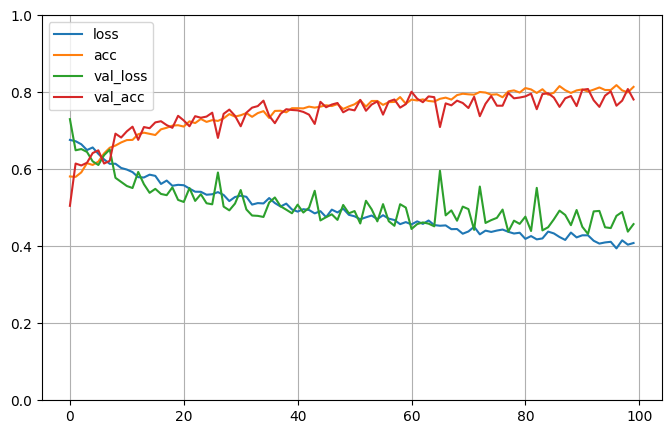

In [15]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
# Path to the test directory (assuming it has a similar structure to the train and validation folders)
test_dir = r"C:\Users\Abhishek\OneDrive\Desktop\ML and DL\Deep Learning\CNN Project\cats_and_dogs_small\test"

# Data generator for the test set (only rescaling, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),          # Resize test images to 150x150
    batch_size=32,                   # Same batch size as in training
    class_mode='binary'              # Binary labels for cat and dog
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=31)  # 1000 test images / 32 batch size

print(f"Test accuracy: {test_acc:.2f}")
print(f"Test loss: {test_loss:.2f}")


Found 1000 images belonging to 2 classes.
31/31 [==============================] - 13s 437ms/step - loss: 0.4831 - acc: 0.7873
Test accuracy: 0.79
Test loss: 0.48
